In [1]:
%pylab
%matplotlib inline
from sdca import *
from sklearn import svm
from sklearn import preprocessing

n = 1000; 
d = 123; 
import readsvm 
#filename = "../datasets/rcv1_train.binary"
filename = "../datasets/a9a_1k"
y, X = readfile(filename,n,d)
#X = preprocessing.scale(X)
A = np.zeros((n,d))
for i in range(n): 
    if(y[i]==2 or y[i] == 0):
        y[i] = -1;
    A[i,:] = y[i]*X[i,:]
lambd = 1.0/n

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [14]:
def simple_svm(A, lambd, num_effective_passes, verbose=False):
  #each row contains a data point with dim d
  # active_stargey: case -1 (nothing), case 1 (reset the block list in each iteration), case 2 ( holding a queue with a limited size), case 3 (online random permutation replacement) 
  inv_sq_row_norms = np.divide(1.0, np.square(np.linalg.norm(A, axis=1)))
  n, d = A.shape
  rperm = range(n);
  
  alpha = np.zeros(n)
  w = w_alpha(alpha,A,lambd)
  obj_value = dual_obj(w,alpha,A,lambd)
  
  stats = [(0.0, obj_value)]
  completed_effective_passes = 0.0
  i = 0
  while completed_effective_passes < num_effective_passes:
    coords = np.random.permutation(n);
    i = i+1
    for ii in coords:
        alpha_i_old = alpha[ii]
        xi = A[ii,:]
        inv_sqi = inv_sq_row_norms[ii]
       
        # coordinate update step 
        delta_alpha_i = max(0,min(1,(lambd*n*(1-np.dot(xi,w))*inv_sqi)+alpha_i_old)) - alpha_i_old
        # update the dual and primal paramters
        alpha[ii] = alpha[ii] + delta_alpha_i
        w = w + delta_alpha_i*xi/(lambd*n)
    past_ef_pass = completed_effective_passes
    completed_effective_passes += len(coords) / float(n)
    obj_value = primal_func(w,A,lambd)-dual_obj(w,alpha,A,lambd)
    stats.append((completed_effective_passes, obj_value))
    if verbose:
      print("update:{},dual:{},primal={}".format(i,dual_obj(w, alpha,A,lambd),primal_func(w,A,lambd)))
  return (alpha, stats,w)

update:1,dual:0.0421875276003,primal=0.467439092445
update:2,dual:0.0790108495508,primal=0.743231488243
update:3,dual:0.113033047878,primal=0.486831247631
update:4,dual:0.14735683016,primal=0.542772520061
update:5,dual:0.182745245466,primal=0.47790716243
update:6,dual:0.213322354286,primal=0.564636314019
update:7,dual:0.244170190011,primal=0.51565915366
update:8,dual:0.268960070923,primal=0.533236592927
update:9,dual:0.292300872082,primal=0.443220594666
update:10,dual:0.3094926919,primal=0.442988475168
update:11,dual:0.322783670929,primal=0.454645512342
update:12,dual:0.335238070003,primal=0.613323099105
update:13,dual:0.344037807371,primal=0.440732387558
update:14,dual:0.350978069111,primal=0.41707770401
update:15,dual:0.357010439865,primal=0.411091299488
update:16,dual:0.361439728693,primal=0.411933130751
update:17,dual:0.365268619348,primal=0.397639519539
update:18,dual:0.368042358271,primal=0.414671619162
update:19,dual:0.369968884233,primal=0.39393106163
update:20,dual:0.371411721

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log2
  app.launch_new_instance()


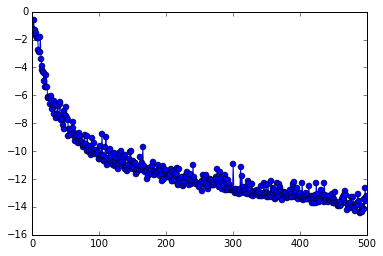

In [21]:
(alpha_n,stats_n,w_n) = simple_svm(A, lambd, 500, verbose=True)
t_perm, f_perm = get_data_plot(stats_n)
plt.plot(t_perm,np.log2(f_perm), marker='o')